In [2]:
import pandas as pd
#import util
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

pd.set_option("display.max_columns", None)

**Corey -**<br>
Changing it from csv to xlsx is unnecessary so I commented it out. The links that were pushed were also specific to someone's file path so I replaced it with a general path.

In [3]:
data = pd.read_csv(r'/Users/Francis/Desktop/Healthcare_dataset.csv')

#xls.sheet_names

In [18]:
data = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')
util.df_info(data, 'Healthcare_dataset.xlsx')


    Number of columns: 69
    Number of rows: 3424
    File size: 0.88MB 
    


In [4]:
#data = pd.read_csv(r'/Users/Francis/Desktop/Healthcare_dataset.csv')
data = data.drop_duplicates()
data = data.dropna()
#Changing the column names to lower case
data.columns = [ x.lower().strip() for x in data.columns]
data.columns

Index(['ptid', 'persistency_flag', 'gender', 'race', 'ethnicity', 'region',
       'age_bucket', 'ntm_speciality', 'ntm_specialist_flag',
       'ntm_speciality_bucket', 'gluco_record_prior_ntm',
       'gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx',
       'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm',
       'tscore_bucket_prior_ntm', 'risk_segment_during_rx',
       'tscore_bucket_during_rx', 'change_t_score', 'change_risk_segment',
       'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx',
       'comorb_encounter_for_screening_for_malignant_neoplasms',
       'comorb_encounter_for_immunization',
       'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
       'comorb_vitamin_d_deficiency',
       'comorb_other_joint_disorder_not_elsewhere_classified',
       'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
       'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia',
       'com

# Use this code to clean the data -Fran
Dropping duplicates (if any)
Dropping Null (if any)
Lower casing the title names

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ptid                                                                3424 non-null   object
 1   persistency_flag                                                    3424 non-null   object
 2   gender                                                              3424 non-null   object
 3   race                                                                3424 non-null   object
 4   ethnicity                                                           3424 non-null   object
 5   region                                                              3424 non-null   object
 6   age_bucket                                                          3424 non-null   object
 7   ntm_speciality          

In [6]:
data.head()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [ ]:
#for col in data.columns:
    #print(data[col].value_counts())

**Corey -**<br>
I moved this code into the util file to make it easier to comment out when needed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


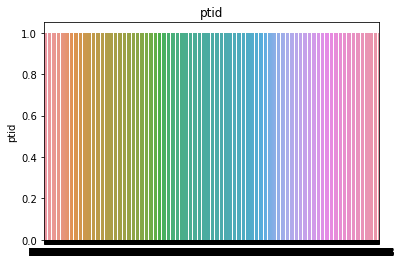

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


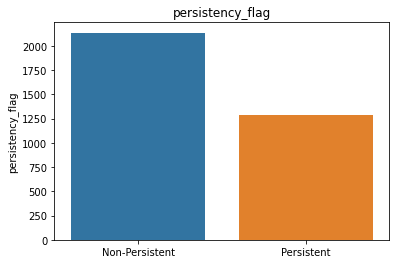

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


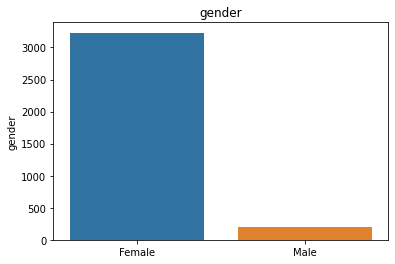

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


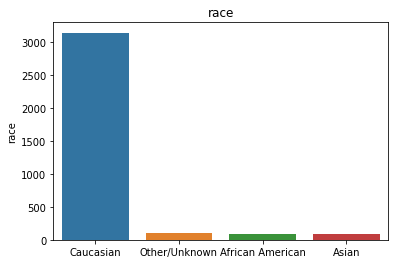

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


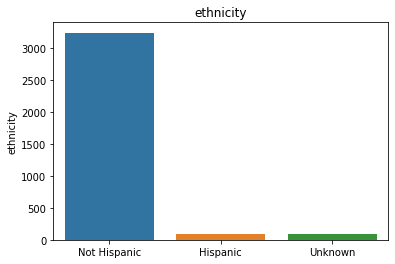

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


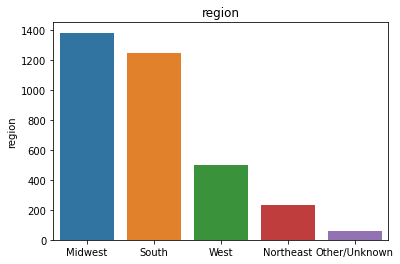

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


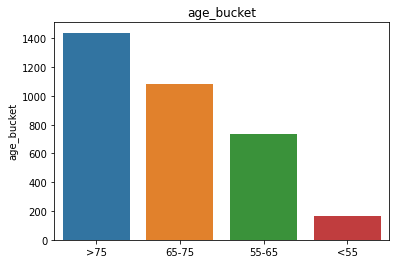

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


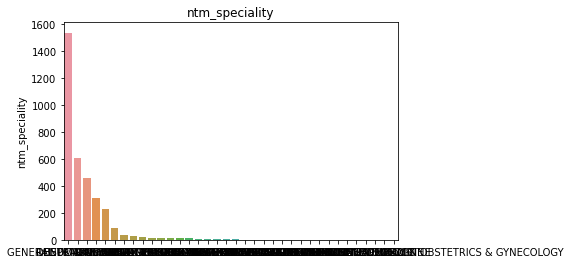

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


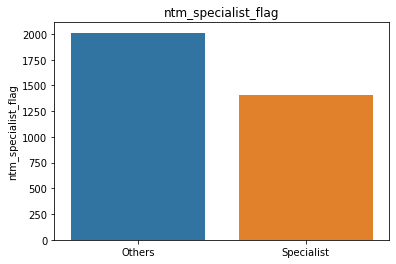

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


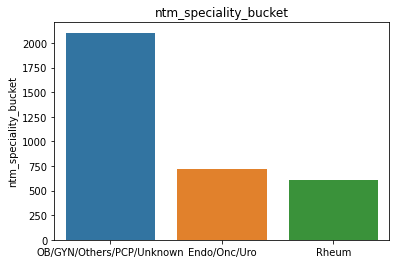

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


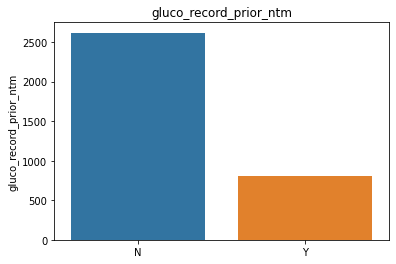

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


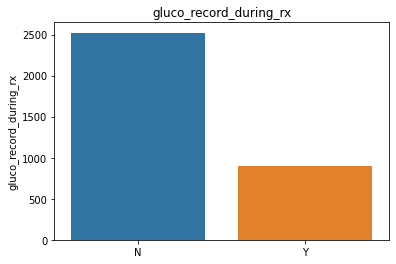

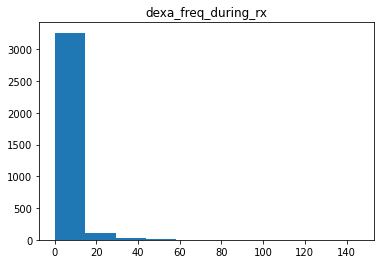

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


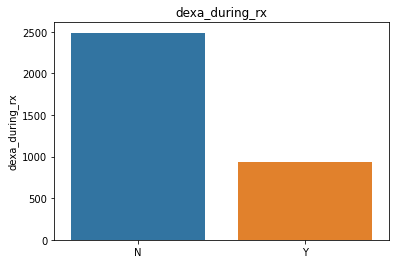

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


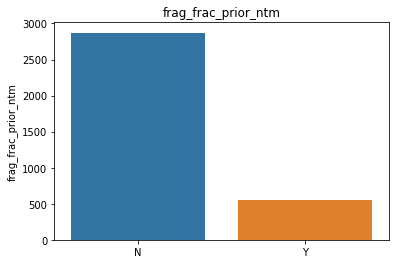

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


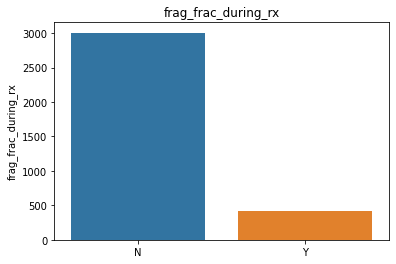

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


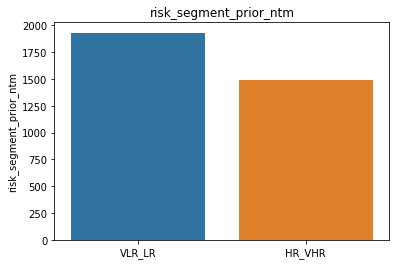

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


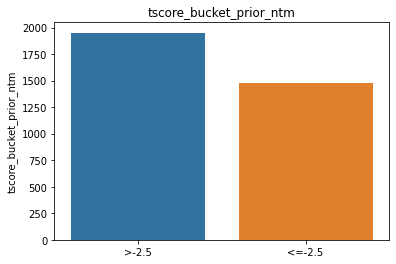

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


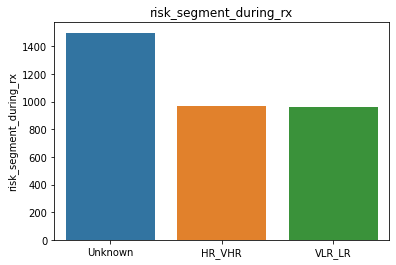

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


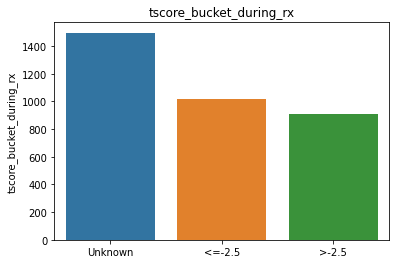

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


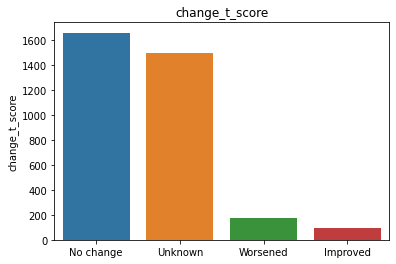

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


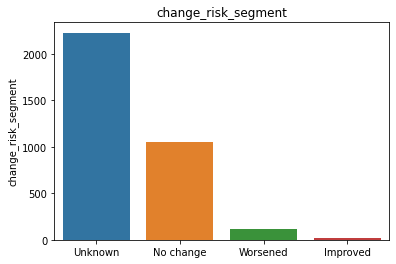

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


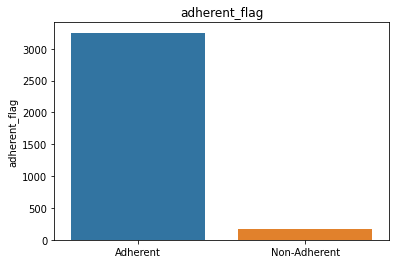

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


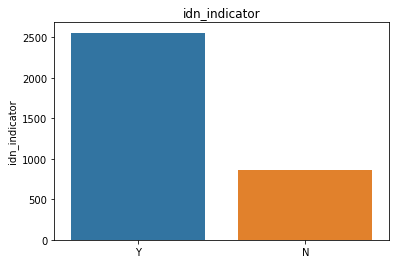

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


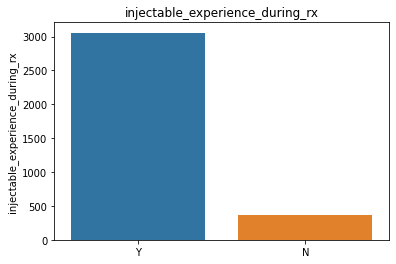

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


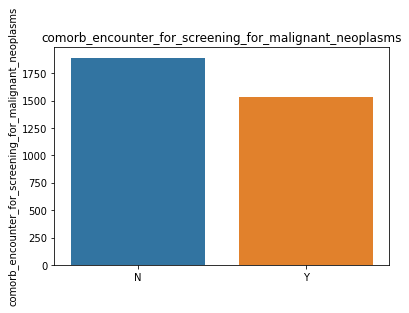

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


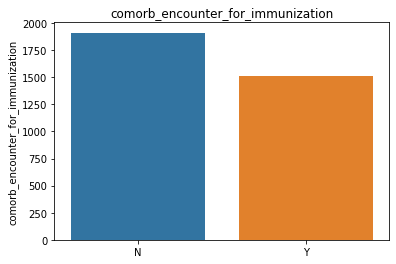

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


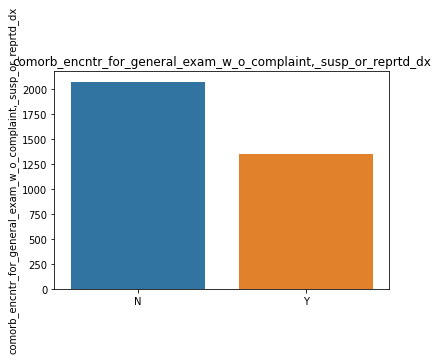

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


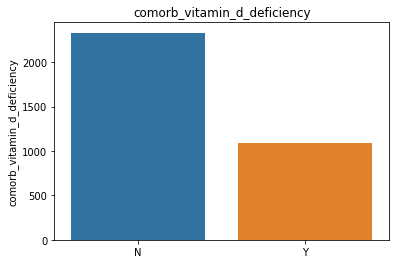

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


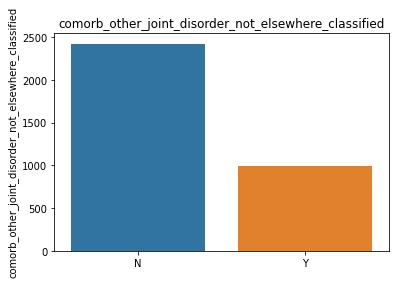

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


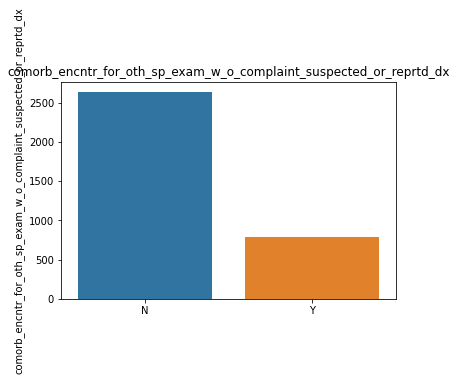

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


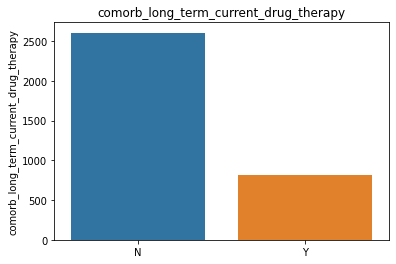

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


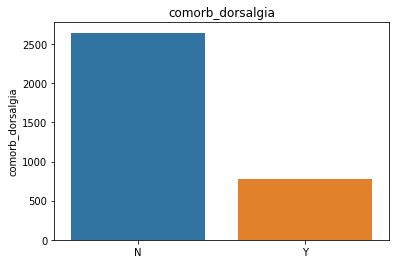

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


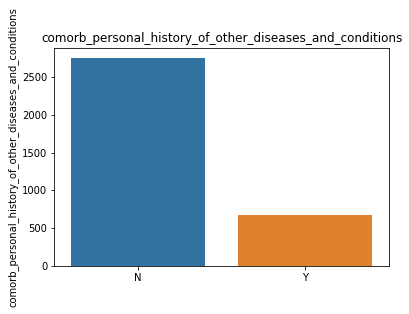

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


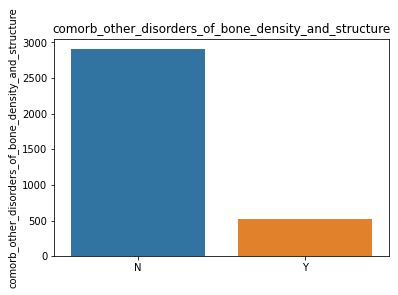

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


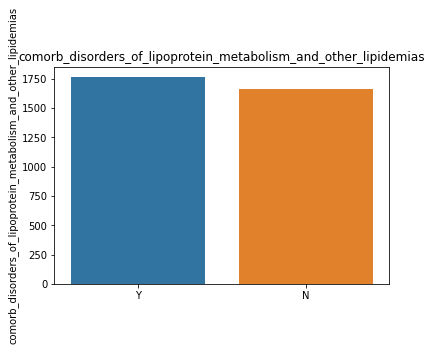

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


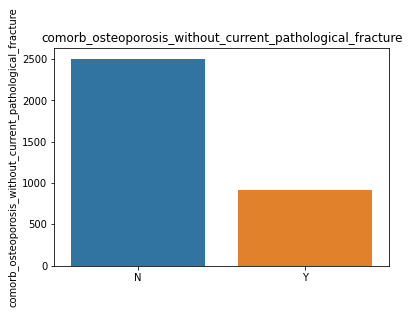

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


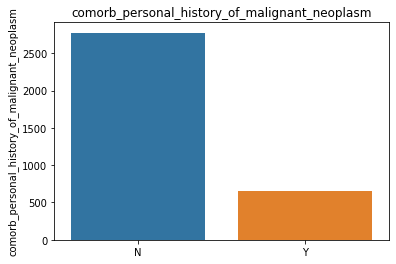

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


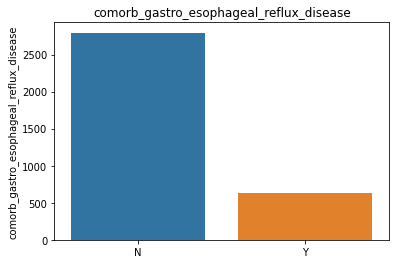

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


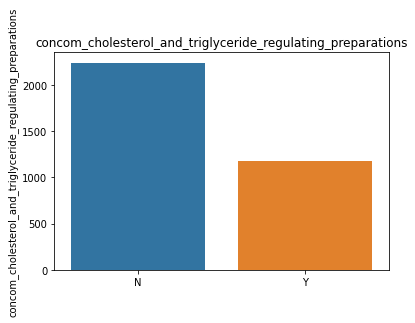

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


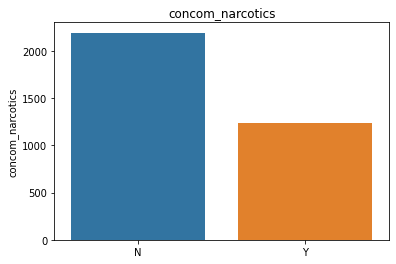

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


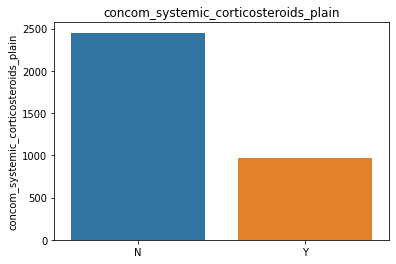

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


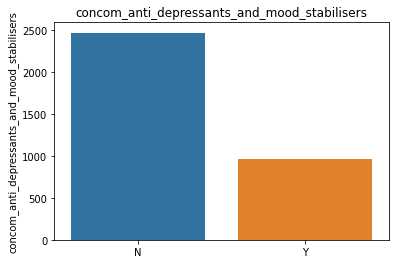

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


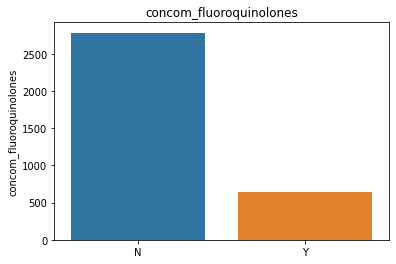

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


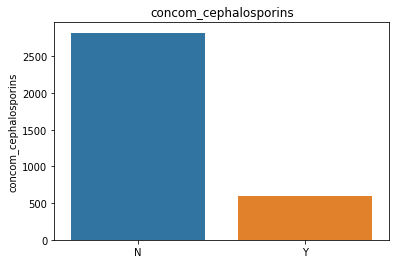

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


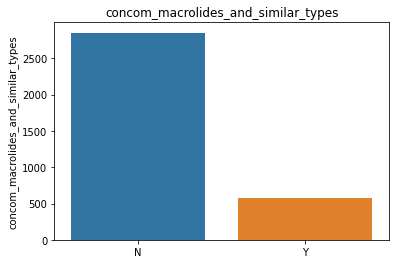

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


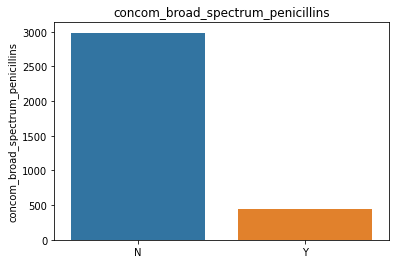

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


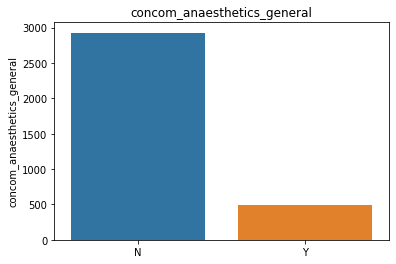

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


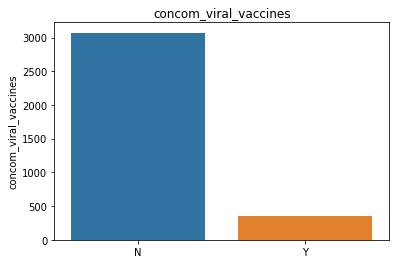

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


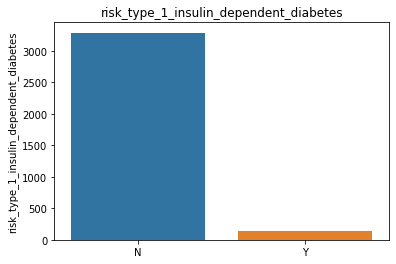

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


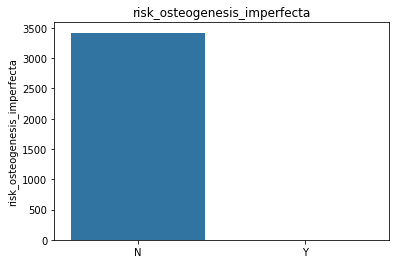

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


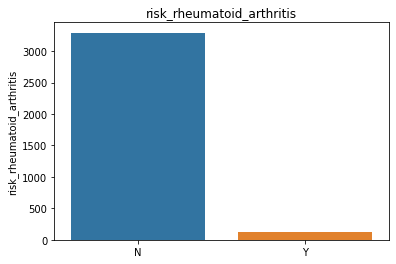

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


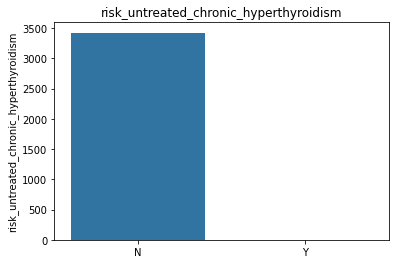

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


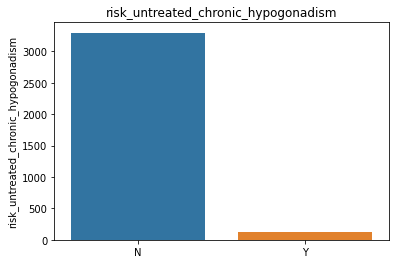

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


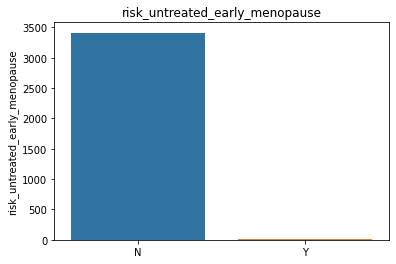

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


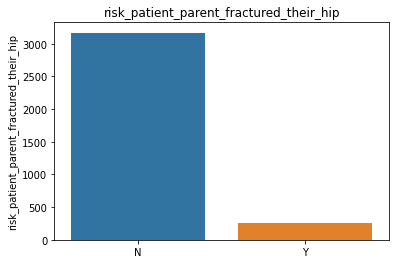

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


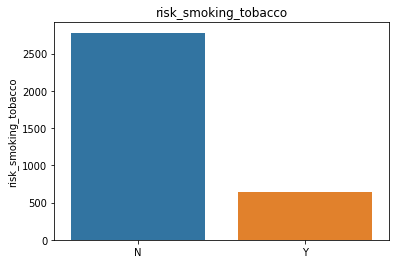

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


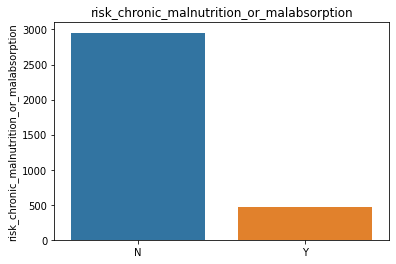

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


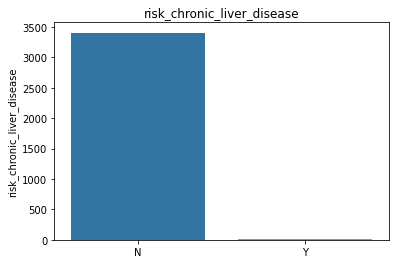

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


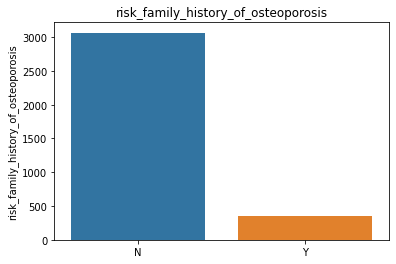

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


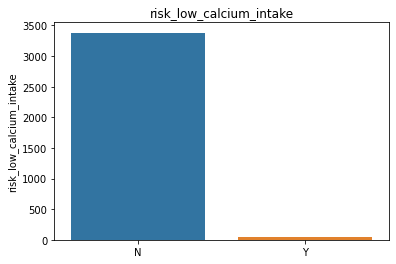

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


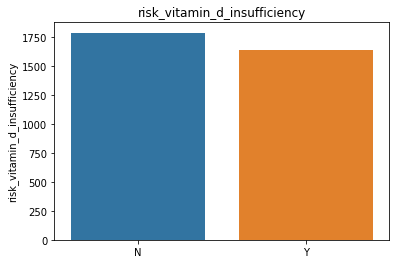

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


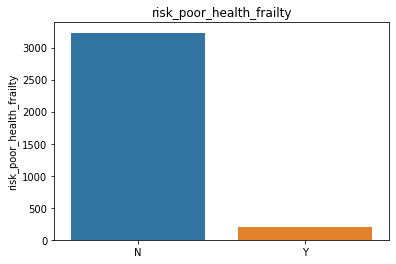

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


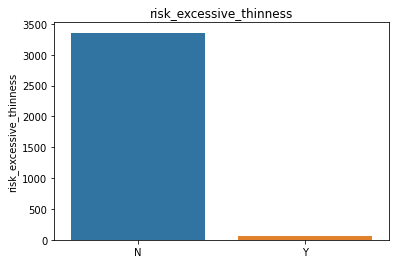

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


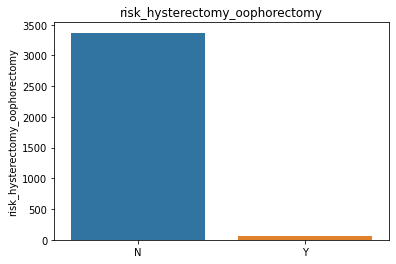

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


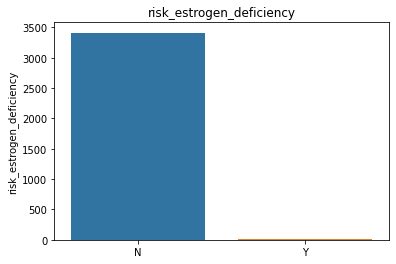

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


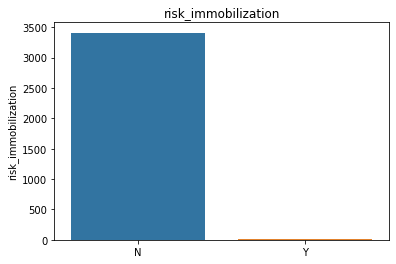

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


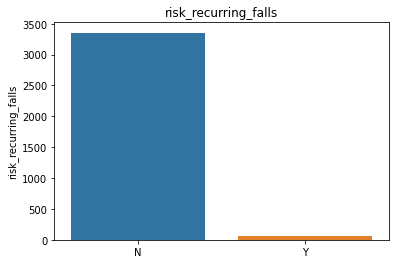

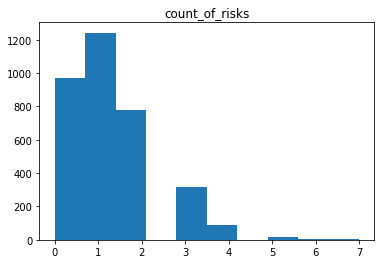

<Figure size 432x288 with 0 Axes>

In [22]:
util.columns_graph(data)

**Corey -** <br>
*ntm_speciality* has too many values with low counts. To address this I have put all keys with values into an `Other` bin to lower its dimensionality.

In [7]:
print(data.ntm_speciality.value_counts())
speciality = ['GENERAL PRACTITIONER', 'RHEUMATOLOGY', 'ENDOCRINOLOGY', 'Unknown', 'ONCOLOGY', 'OBSTETRICS AND GYNECOLOGY']
data.ntm_speciality = data.ntm_speciality.apply(lambda x: x if x in speciality else 'Other')
print(data.ntm_speciality.value_counts())

GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
HEMATOLOGY & ONCOLOGY                                               14
OTOLARYNGOLOGY                                                      14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                                11
PULMON

**Corey -**<br>
Below I am turning the binary categorical data into numeric. The following cell loops through all columns with 'Y', 'N' values.

**Francis_**<br>
This one also ends up changing all binary values into only 1s

**Corey -**<br>
Fixed the issue


In [ ]:
#yn_binary = ['gluco_record_prior_ntm', 'gluco_record_during_rx', 'dexa_during_rx', 'frag_frac_prior_ntm', 'frag_frac_during_rx', 'idn_indicator', 'injectable_experience_during_rx',
#'comorb_encounter_for_screening_for_malignant_neoplasms', 'comorb_encounter_for_immunization', 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
#'comorb_vitamin_d_deficiency', 'comorb_other_joint_disorder_not_elsewhere_classified', 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
#'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia', 'comorb_personal_history_of_other_diseases_and_conditions', 'comorb_other_disorders_of_bone_density_and_structure',
#'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias', 'comorb_osteoporosis_without_current_pathological_fracture',
#'comorb_personal_history_of_malignant_neoplasm', 'comorb_gastro_esophageal_reflux_disease', 'concom_cholesterol_and_triglyceride_regulating_preparations',
#'concom_narcotics', 'concom_systemic_corticosteroids_plain', 'concom_anti_depressants_and_mood_stabilisers', 'concom_fluoroquinolones', 'concom_cephalosporins',
#'concom_macrolides_and_similar_types', 'concom_broad_spectrum_penicillins', 'concom_anaesthetics_general', 'concom_viral_vaccines', 'risk_type_1_insulin_dependent_diabetes',
#'risk_osteogenesis_imperfecta', 'risk_rheumatoid_arthritis', 'risk_untreated_chronic_hyperthyroidism', 'risk_untreated_chronic_hypogonadism', 'risk_untreated_early_menopause',
#'risk_patient_parent_fractured_their_hip', 'risk_smoking_tobacco', 'risk_chronic_malnutrition_or_malabsorption', 'risk_chronic_liver_disease', 'risk_family_history_of_osteoporosis',
#'risk_low_calcium_intake', 'risk_vitamin_d_insufficiency', 'risk_poor_health_frailty', 'risk_excessive_thinness', 'risk_hysterectomy_oophorectomy', 'risk_estrogen_deficiency',
#'risk_immobilization']

#for col in yn_binary:
    #data[col] = data[col].apply(lambda x: 1 if x == 'Y' else 0)
    #print(data[col].value_counts())


**Corey -**<br>
In the following cell I am converting the binary columns that have different values into numerical values. <br>
I created 2 new columns with titles that I feel more accuratly fit the binary data. I have not yet removed the original columns.

**Francis -**<br>
I believe it is this code below that is altering the dataset to be all '1's rather than distinguishing

**Corey -**<br>
Fixed the issue

**Motamen -**<br>

gender, ntm_specialist_flag, and adherent_flag have all 0s according to the print statement. I will comment this cell and fix it. 
Have a look and feel free to change if it is needed.


In [38]:

#data.gender = data.gender.apply(lambda x: 1 if x == 'Female' else 0)
#data.ntm_specialist_flag = data.ntm_specialist_flag.apply(lambda x: 1 if x == 'Specialist' else 0)
#data.adherent_flag = data.adherent_flag.apply(lambda x: 1 if x == 'Adherent' else 0)

#data['risk_segment_prior_ntm_vlr'] = data.risk_segment_prior_ntm.apply(lambda x: 1 if x == 'VLR_LR' else 0)
#data['tscore_bucket_prior_ntm_gt_neg_25'] = data.tscore_bucket_prior_ntm.apply(lambda x: 1 if x == '>-2.5' else 0)

#print(data.gender.value_counts())
#print(data.ntm_specialist_flag.value_counts())
#print(data.adherent_flag.value_counts())
#print(data['risk_segment_prior_ntm_vlr'].value_counts())
#print(data['tscore_bucket_prior_ntm_gt_neg_25'].value_counts())


In [24]:
#data.head(10)

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
5,P6,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,2
6,P7,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,2,Y,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1
7,P8,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACT

In [ ]:
data['gluco_record_prior_ntm'].value_counts()

N    2619
Y     805
Name: gluco_record_prior_ntm, dtype: int64

**Francis_**<br>
Use the replace function to replace all categorical Ys and Ns to 1s and 0s

**Corey -**<br>
This code is easier to read than mine and should be used instead

In [25]:
data = data.replace(to_replace=['N', 'Y'], value=[0, 1])

In [16]:
data['gluco_record_prior_ntm'].value_counts()

0    2619
1     805
Name: gluco_record_prior_ntm, dtype: int64

**Motamen -** <br> 
changing the persistency flag (target variable) into 0s and 1s for non persistent and persistent respectively

In [32]:
#apply label encoder to convert target variable into numerical
le = LabelEncoder()
data.persistency_flag = le.fit_transform(data.persistency_flag)
data.head()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,P1,1,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,P2,0,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,P3,0,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,P4,0,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,1,0,0,0,0,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,P5,0,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,1,0,0,0,0,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


**Motamen -** <br>
Converting all categorical features to numerical

In [63]:
#apply ordinal encoder to convert all the categorical features (binary and non-binary)
oe = OrdinalEncoder(dtype = int)
data.gender = le.fit_transform(data.gender)
for i in data.columns:
    if i=='ptid' or i=='count_of_risks':
        continue
    else:
        data[i] = oe.fit_transform(data[i].to_numpy().reshape(-1 , 1))
data.head()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,P1,1,1,2,1,4,3,1,0,1,0,0,0,0,0,0,1,1,2,0,1,2,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,P2,0,1,1,1,4,0,1,0,1,0,0,0,0,0,0,1,1,1,2,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,P3,0,0,3,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,P4,0,0,2,1,0,3,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,P5,0,0,2,1,0,3,1,0,1,1,1,0,0,0,0,0,0,1,2,2,2,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


**Motamen -**<br>
You can see that all features are numerical (except for the ptid, which will be excluded later on)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ptid                                                                3424 non-null   object
 1   persistency_flag                                                    3424 non-null   int64 
 2   gender                                                              3424 non-null   int64 
 3   race                                                                3424 non-null   int64 
 4   ethnicity                                                           3424 non-null   int64 
 5   region                                                              3424 non-null   int64 
 6   age_bucket                                                          3424 non-null   int64 
 7   ntm_speciality          

In [8]:
data.head()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [19]:
data.groupby(['gender']).count()



,ptid,persistency_flag,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230
Male,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194


<AxesSubplot:>

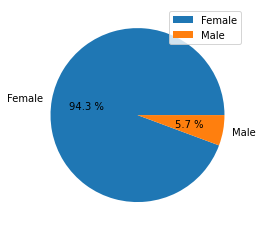

In [10]:
s = pd.Series(data.gender)
s.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True)

In [20]:
data.groupby(['region']).count()


,ptid,persistency_flag,gender,race,ethnicity,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383
Northeast,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
Other/Unknown,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
South,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
West,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502,502


<AxesSubplot:>

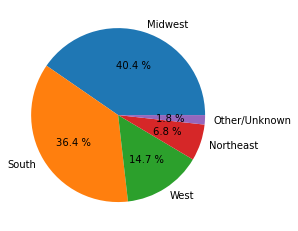

In [22]:
r = pd.Series(data.region)
r.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='')

In [24]:
data.groupby(['race']).count()


,ptid,persistency_flag,gender,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
race,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
African American,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
Asian,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
Caucasian,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148,3148
Other/Unknown,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97


<AxesSubplot:>

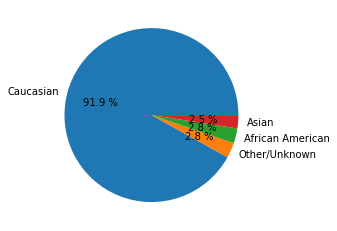

In [25]:
a = pd.Series(data.race)
a.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='')